In [1]:
import os
import pandas as pd
import seaborn as sns
sns.set()
import numpy as np
import matplotlib.pyplot as plt

## 1. Examine the dataset. Are there any missing observations or columns where the data do not seem valid?

In [2]:
cash_outlet = pd.read_csv('training.csv')

In [3]:
cash_outlet.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [4]:
cash_outlet.isnull().values.any()

False

There are no missing values in the dataset.

In [5]:
cash_outlet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 37 columns):
ID                             7094 non-null int64
Q1                             7094 non-null int64
Q2                             7094 non-null int64
Q3                             7094 non-null int64
Q4                             7094 non-null int64
Q5                             7094 non-null int64
Q6                             7094 non-null int64
Q7                             7094 non-null int64
Q8_1                           7094 non-null int64
Q8_2                           7094 non-null int64
Q8_3                           7094 non-null int64
Q8_4                           7094 non-null int64
Q8_5                           7094 non-null int64
Q8_6                           7094 non-null int64
Q8_7                           7094 non-null int64
Q8_8                           7094 non-null int64
Q8_9                           7094 non-null int64
Q8_10                     

## 2. Get basic descriptive statistics for the dataset.

In [6]:
cash_outlet.describe()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,...,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000
mean,4742.627291,38.239498,1.559910,1.787426,3.060051,2.548915,1.840569,1.397942,0.062165,0.630110,...,-0.431914,1.860164,3.163378,-6.034378,35.354029,0.553989,0.461517,0.432901,0.151255,1.799267
std,2731.120086,16.332148,0.496433,1.165160,1.557779,1.534257,0.366103,0.489508,0.241472,0.482809,...,1.489879,1.351372,1.317691,2.720888,2.899511,0.497112,0.498552,0.495512,0.358322,1.196955
min,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,1.000000,-11.467463,29.639578,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2397.250000,25.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,2.000000,-8.275387,32.935429,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4744.500000,35.000000,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1.000000,...,-1.000000,1.000000,4.000000,-6.087854,35.073326,1.000000,0.000000,0.000000,0.000000,2.000000
75%,7105.000000,48.000000,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,...,-1.000000,4.000000,4.000000,-3.517053,38.351815,1.000000,1.000000,1.000000,0.000000,3.000000
max,9459.000000,100.000000,2.000000,4.000000,8.000000,6.000000,2.000000,2.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
cash_outlet.rename(inplace=True, columns={
    'Q1':'age',
    'Q2':'gender',
    'Q3':'marital status',
    'Q4':'Highest level of education',
    'Q5':'property ownership',
    'Q6':'land ownership',
    'Q7':'personal mobile status',
    'Q8_1':'salaries or wages',
    'Q8_2':'money trading or selling',
    'Q8_3':'money providing a service',
    'Q8_4':'money casual work',
    'Q8_5':'money rental income',
    'Q8_6':'money interests',
    'Q8_7':'money pension',
    'Q8_8':'money social welfare',
    'Q8_9':'money financially dependant',
    'Q8_10':'money no income',
    'Q8_11':'other',
    'Q9':'salaries or wages',
    'Q10':'selling things',
    'Q11':'providing a service',
    'Q12':'send money to another country',
    'Q13':'money last sent',
    'Q14':'received money from another country',
    'Q15':'last money received',
    'Q16':'mobile money purchases',
    'Q17':'mobile money bills',
    'Q18':'literacy in kwiswhahili',
    'Q19':'literacy in english'
    
})

Column names have been changed to what each column represents

In [8]:
cash_outlet.head()

,ID,age,gender,marital status,Highest level of education,property ownership,land ownership,personal mobile status,salaries or wages,money trading or selling,...,mobile money bills,literacy in kwiswhahili,literacy in english,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


## 3. Create appropriate graphs to visually represent the relationship between financial services accessed (non-mobile, mobile, both) and age, gender, marital status, land ownership and type of income.

In [9]:
cash_outlet.mobile_money_classification.replace([0,1,2,3],['None','FS_only','MM_only','MM_FS'],inplace=True)

/home/puleng/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [10]:
cash_outlet.groupby(by='mobile_money_classification').size()

mobile_money_classification
0    1386
1    1778
2     804
3    3126
dtype: int64

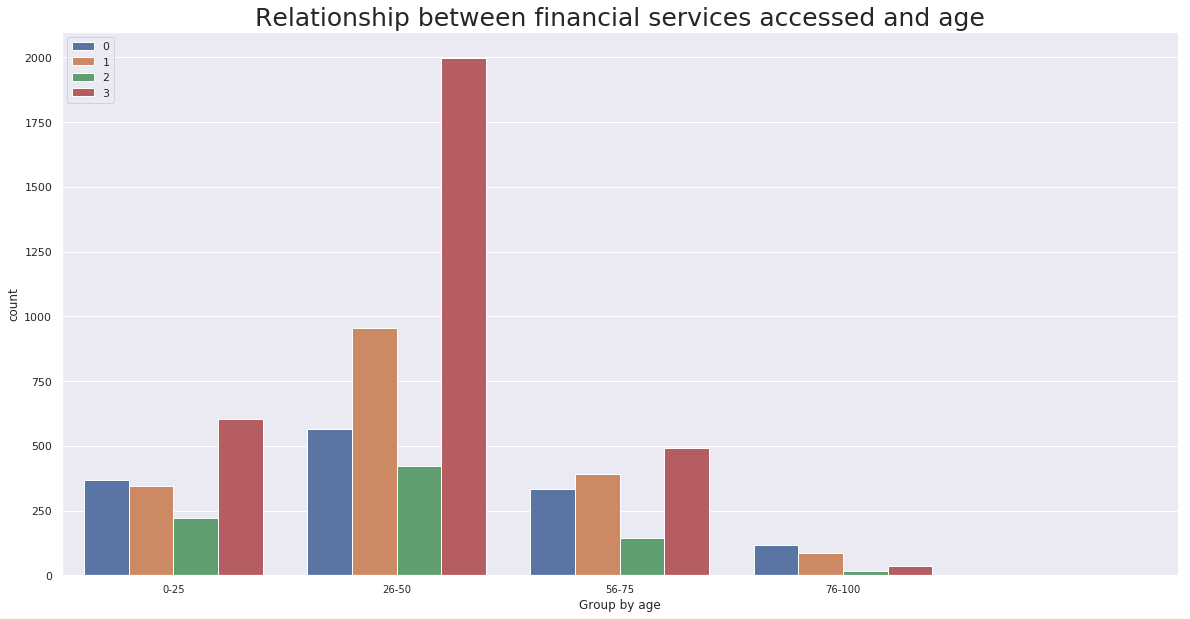

In [11]:
cash_outlet['Group by age'] = cash_outlet.age.apply(lambda x : int(x/25) * 10)

plt.figure(figsize=(20,10))
sns.countplot(x = 'Group by age', hue = 'mobile_money_classification',data = cash_outlet)
plt.legend(loc = 'best')
plt.title("Relationship between financial services accessed and age", fontsize=25)
plt.xticks(np.arange(4), ['0-25', '26-50', '56-75', '76-100'], fontsize=10)

plt.show()

The graph shows that between the ages of (26-50), that is where most of the activity is with regards to accessing finacial services, with the access of both services(Financial services and mobile money) being the highest out of all the groups. This could be because this group represents people who are working or in business and maybe required to use these services on a regular basis.

In [12]:
cash_outlet.gender.replace([1,2],['Male','Female'],inplace=True)                    

In [13]:
cash_outlet.groupby(by='gender').size()

gender
1    3122
2    3972
dtype: int64

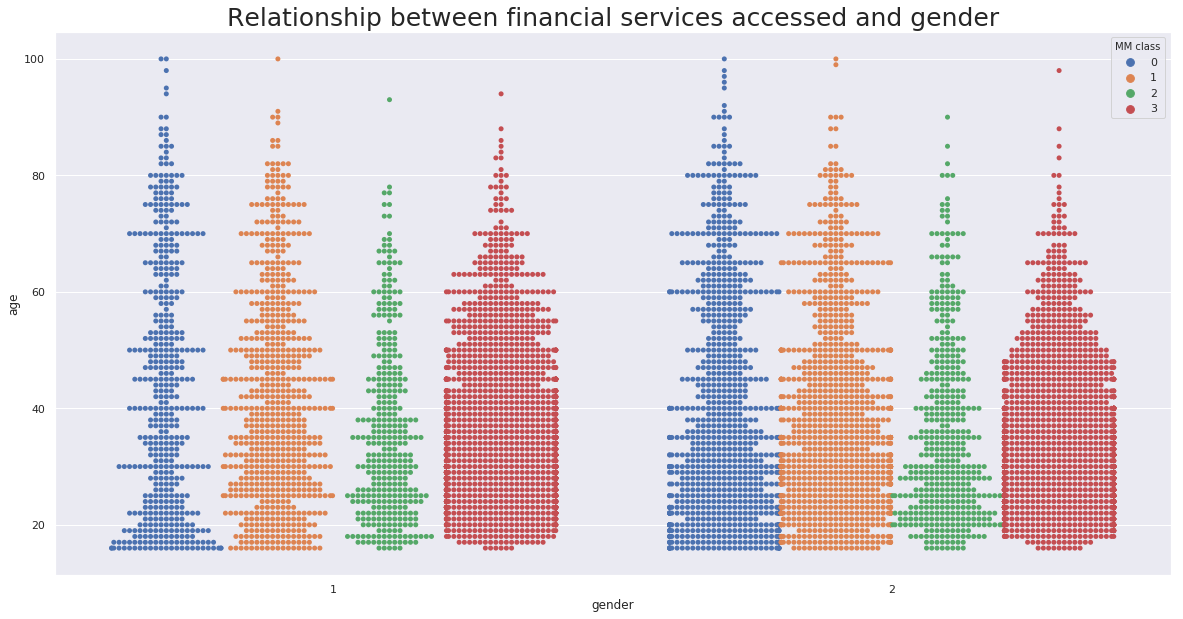

In [14]:
plt.figure(figsize=(20,10))
sns.swarmplot(x='gender', y='age', data=cash_outlet, hue='mobile_money_classification', dodge=True)
plt.legend(title='MM class', loc = 'best')
plt.title("Relationship between financial services accessed and gender", fontsize=25)

plt.show()

On this graph, with both groups(male,female), they mostly have both services and less people use mobile money only. We can also see that between the ages of 20-60, that is where most of the activity happens across all the finacial services classes.

In [15]:
cash_outlet['marital status'].replace([1,2,3,4],['Married','Divorced','Widowed','Never married'],inplace=True)

In [16]:
cash_outlet.groupby(by='marital status').size()

marital status
1    4548
2     687
3     678
4    1181
dtype: int64

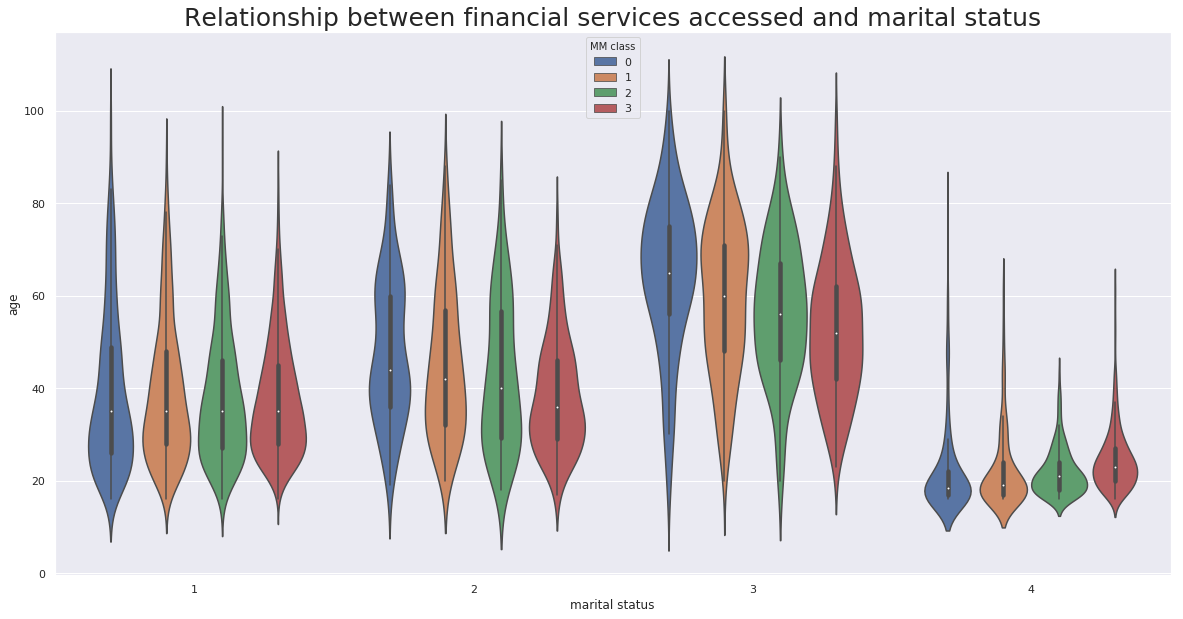

In [17]:
plt.figure(figsize=(20,10))
sns.violinplot(x='marital status', y='age', data=cash_outlet, hue='mobile_money_classification', dodge=True)
plt.legend(title='MM class', loc = 'upper center')
plt.title("Relationship between financial services accessed and marital status", fontsize=25)

plt.show()

The lowest group is that which cosists mostly of the youth(16-35) and at their 20's is where most of the activity is. The widowed group has the most activity throughout all the financial services classes and across all age groups.

In [18]:
cash_outlet['land ownership'].replace([1,2],['Yes', 'No'],inplace=True)

In [19]:
cash_outlet.groupby(by='land ownership').size()

land ownership
1    1131
2    5963
dtype: int64

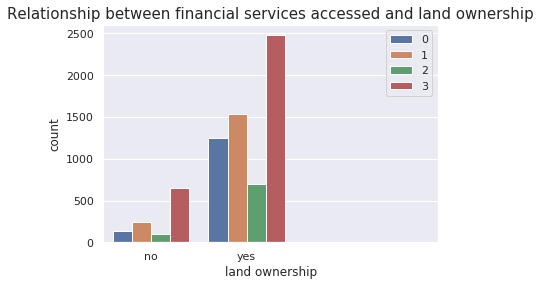

In [20]:
sns.countplot(x = 'land ownership', hue = 'mobile_money_classification',data = cash_outlet)
plt.legend(loc = 'best')
plt.title("Relationship between financial services accessed and land ownership", fontsize=15)
plt.xticks(np.arange(4), ['no', 'yes'])
plt.show()

This graph shows that land owners use less of the financial services. Both groups use both mobile money and financil services mostly. 

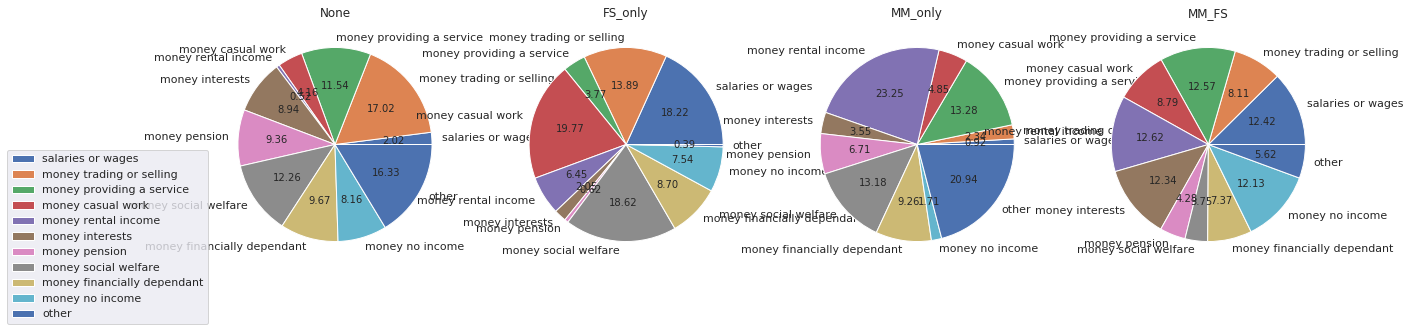

In [21]:
df = pd.DataFrame(3 * np.random.rand(11, 4), index=['salaries or wages','money trading or selling',
                          'money providing a service',
                          'money casual work',
                          'money rental income',
                          'money interests',
                          'money pension',
                          'money social welfare',
                          'money financially dependant',
                          'money no income', 'other'], 
                  columns=['None','FS_only','MM_only','MM_FS'])

labels = list(['salaries or wages','money trading or selling',
                          'money providing a service',
                          'money casual work',
                          'money rental income',
                          'money interests',
                          'money pension',
                          'money social welfare',
                          'money financially dependant',
                          'money no income', 'other'])

fig, axes = plt.subplots(1,4, figsize=(20,50))
for ax, col in zip(axes, df.columns):
    ax.pie(df[col], labels = labels, autopct='%.2f')
    ax.set(ylabel='', title=col, aspect='equal')

axes[0].legend(bbox_to_anchor=(0, 0.5))
plt.show()

Looking at the first piegraph, we can see that the highest percentage is from pensioners and maybe because of age, they dont have access to these services and maybe have no interest in them. Those who are financially dependant dominate in the financial services only group, it could be because the group could represent unemployed people who do not have access to mobile phones and the interenet, as well as older people who may be unable to use mobile money.

## 4. Create appropriate graphs to visually represent the relationship between how often mobile services are used and age, gender, marital status, land ownership and type of income.

In [22]:
cash_outlet['mobile money purchases'].replace([1,2,3,4,5],['No','Daily','Weekly','Monthly','Less_monthly'],inplace=True)

In [23]:
cash_outlet.groupby(by='mobile money purchases').size()

mobile money purchases
1    5089
2      77
3     248
4     543
5    1137
dtype: int64

In [24]:
cash_outlet['mobile money bills'].replace([1,2,3,4,5,6],['N_A','Nill','Day','Week','Month','Less_month'],inplace=True)

In [25]:
cash_outlet.groupby(by='mobile money bills').size()

mobile money bills
-1    6025
 1     460
 2      23
 3      58
 4     359
 5     169
dtype: int64

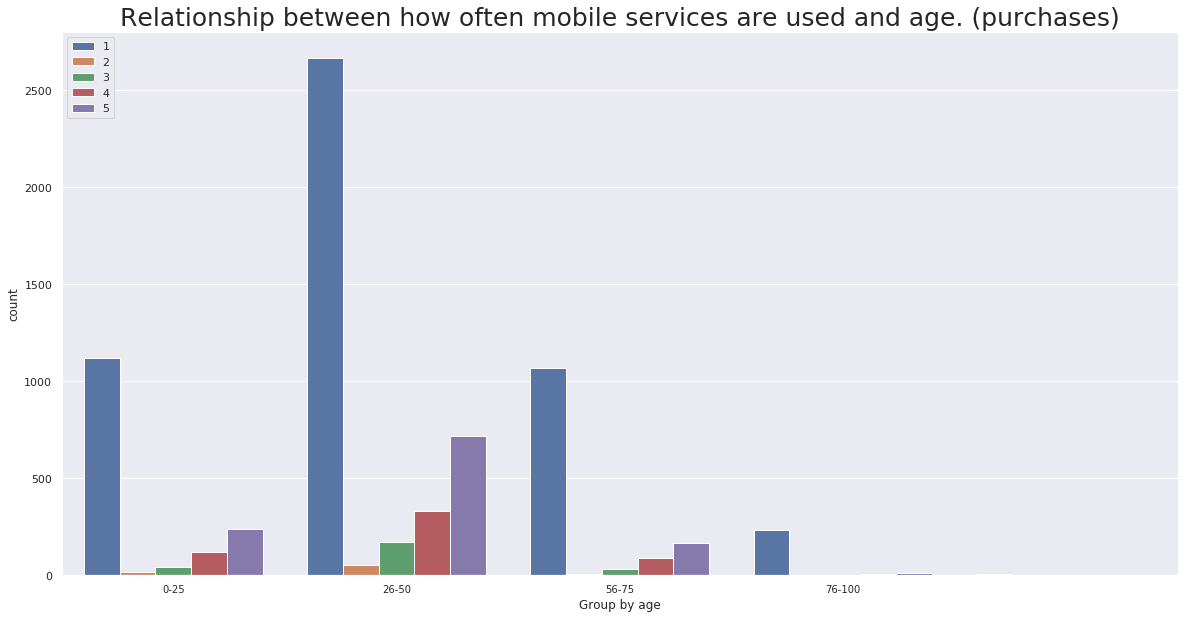

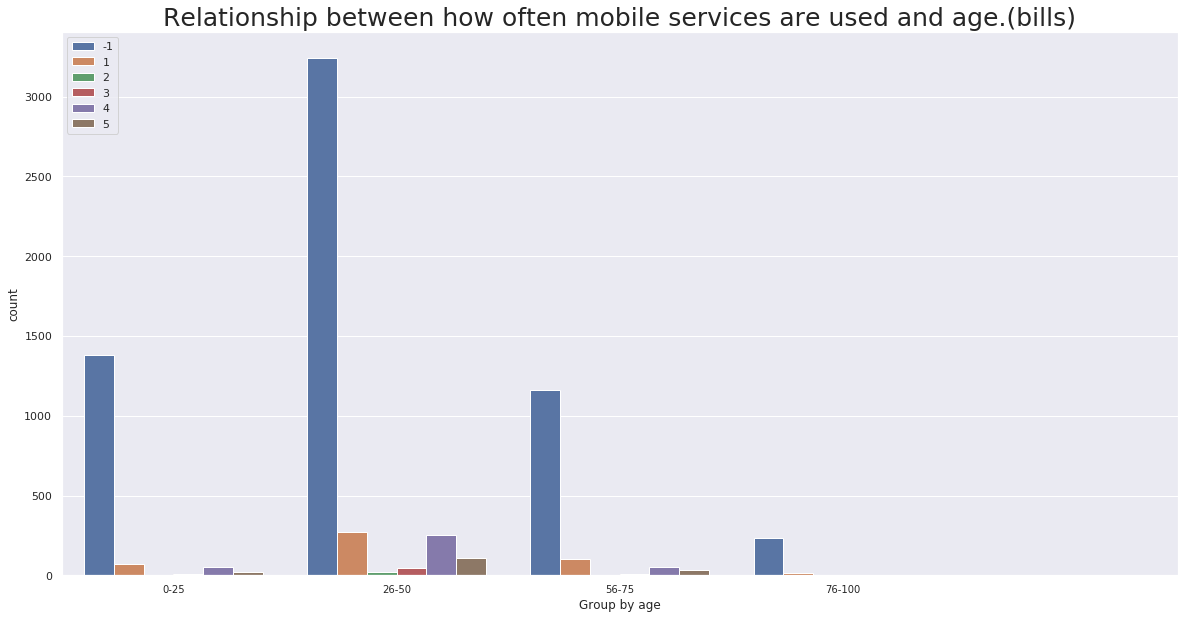

In [26]:
cash_outlet['Group by age'] = cash_outlet.age.apply(lambda x : int(x/25) * 10)

plt.figure(figsize=(20,10))
sns.countplot(x = 'Group by age', hue = 'mobile money purchases',data = cash_outlet)
plt.legend(loc = 'best')
plt.title("Relationship between how often mobile services are used and age. (purchases)", fontsize=25)
plt.xticks(np.arange(4), ['0-25', '26-50', '56-75', '76-100'], fontsize=10)

plt.show()

plt.figure(figsize=(20,10))
sns.countplot(x = 'Group by age', hue = 'mobile money bills',data = cash_outlet)
plt.legend(loc = 'best')
plt.title("Relationship between how often mobile services are used and age.(bills)", fontsize=25)
plt.xticks(np.arange(4), ['0-25', '26-50', '56-75', '76-100'], fontsize=10)

plt.show()


In all the groups for both purchases and bills, most people do not use mobile services, with the older group (76-100) in both purchases and bills being the one with the least amount of people using these mobile services.

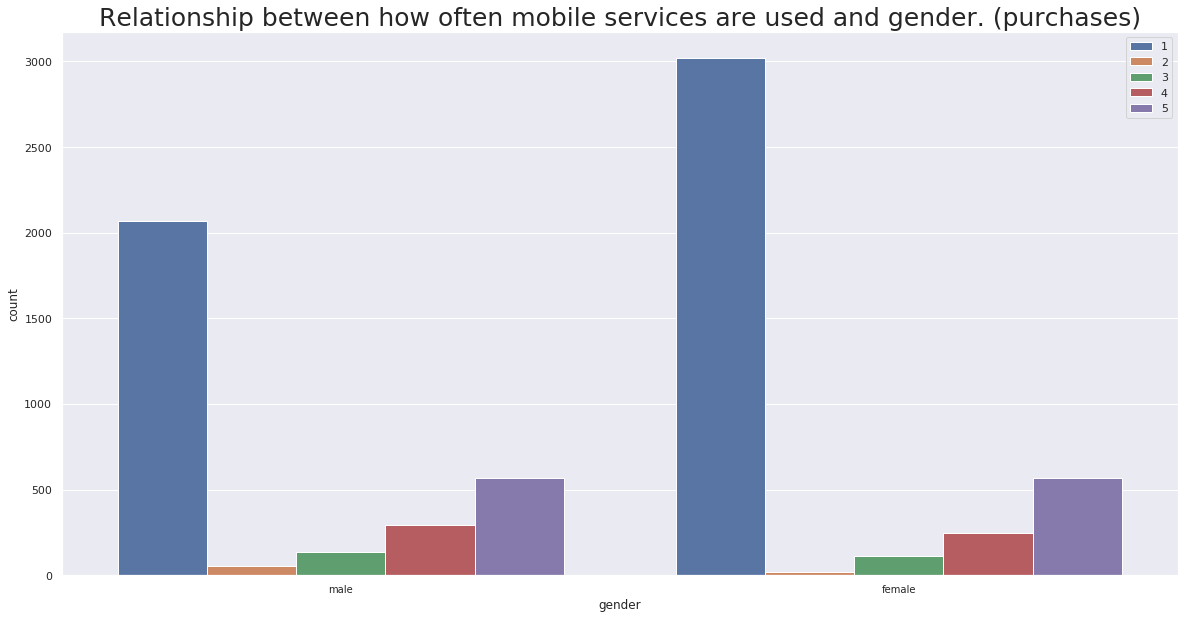

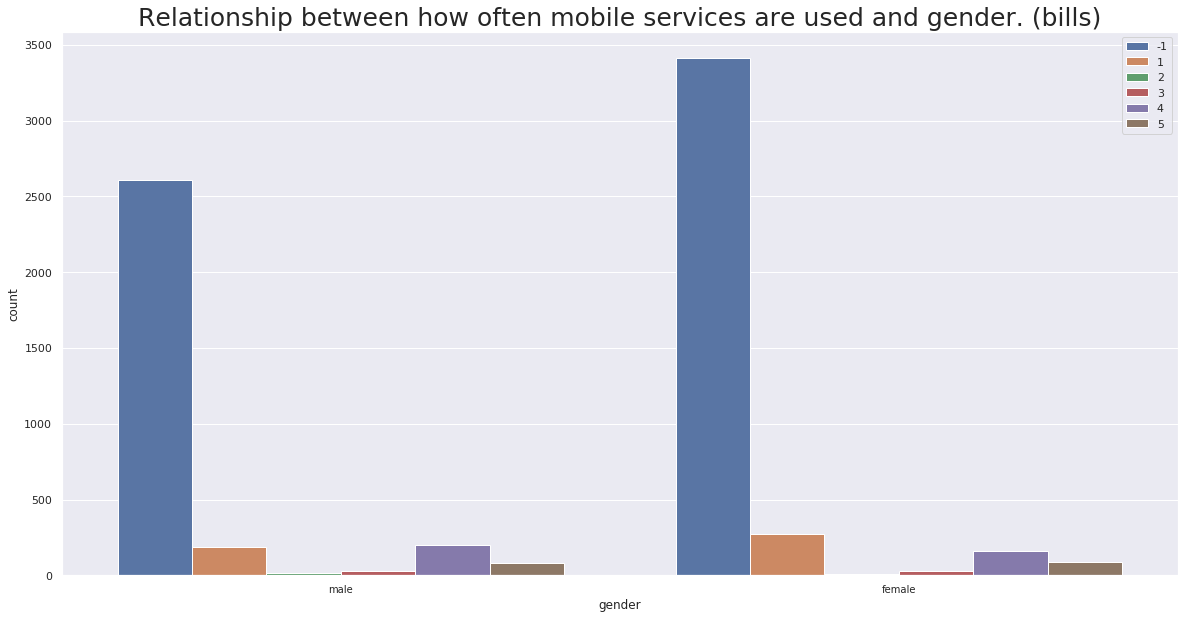

In [27]:
plt.figure(figsize=(20,10))
sns.countplot(x = 'gender', hue = 'mobile money purchases',data=cash_outlet)
plt.legend(loc = 'best')
plt.title("Relationship between how often mobile services are used and gender. (purchases)", fontsize=25)
plt.xticks(np.arange(2), ['male', 'female'], fontsize=10)
plt.show()

plt.figure(figsize=(20,10))
sns.countplot(x='gender', hue='mobile money bills', data=cash_outlet)
plt.title("Relationship between how often mobile services are used and gender. (bills)", fontsize=25)
plt.legend(loc="upper right")
plt.xticks(np.arange(2), ['male', 'female'], fontsize=10)
plt.show()

females use the mobile services more. This is seen from the length of the females group bar on the graph, being lower in the (no) category for both purchases and bills.With purchases, both males and females use mobile services on less than a month and it colud be because these are uniform and planned purchases that occur each month.

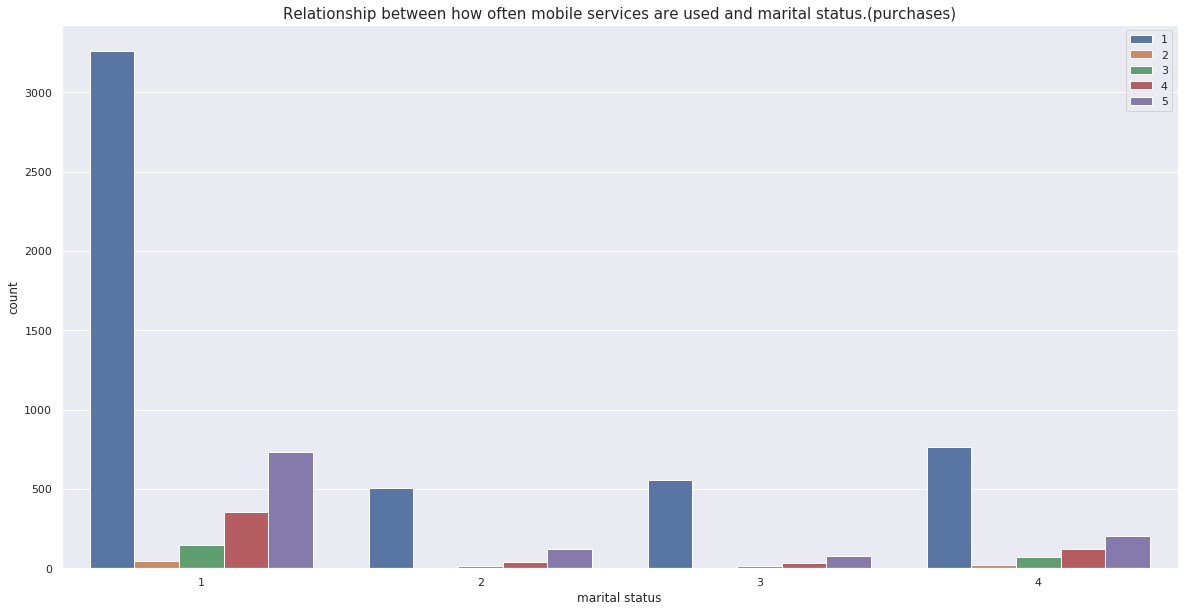

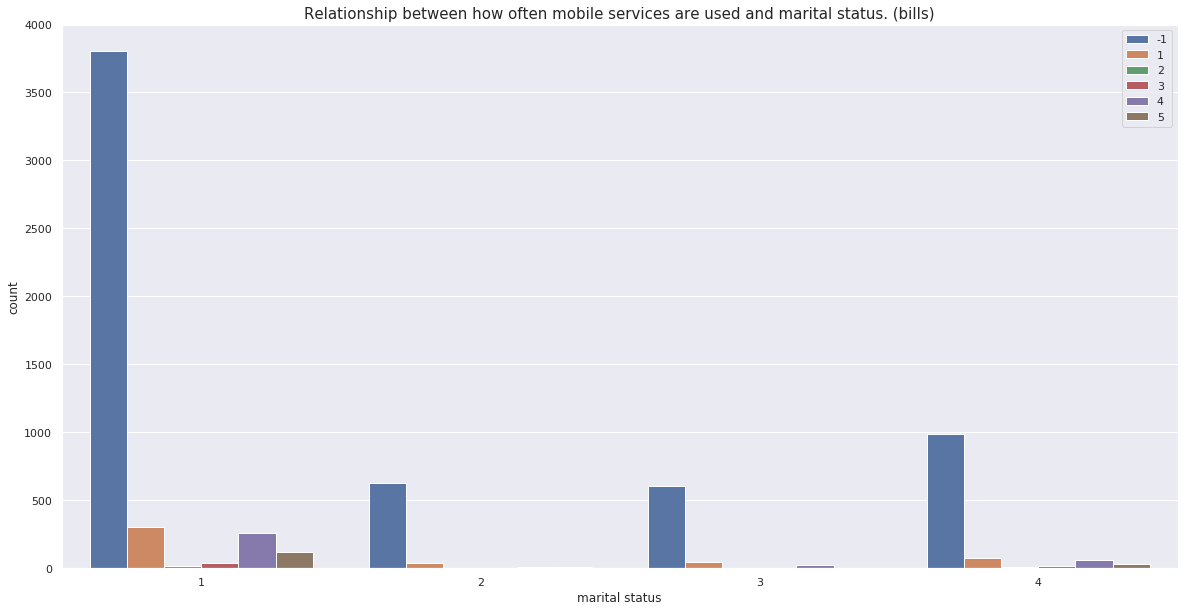

In [28]:
plt.figure(figsize=(20,10))
sns.countplot(x='marital status', data=cash_outlet, hue='mobile money purchases')
plt.title("Relationship between how often mobile services are used and marital status.(purchases)", fontsize=15)
plt.legend(loc="upper right")
plt.show()

plt.figure(figsize=(20,10))
sns.countplot(x='marital status', data=cash_outlet, hue='mobile money bills')
plt.title("Relationship between how often mobile services are used and marital status. (bills)", fontsize=15)
plt.legend(loc="upper right")
plt.show()

Most married couples do not use mobile services at all, however there is a small percentage which is higher than the rest of the groups in marital status which uses the mobile services for purchases and bills with purchases being the highest. Married people also dominate in both purchases and bills for the less than a month category.

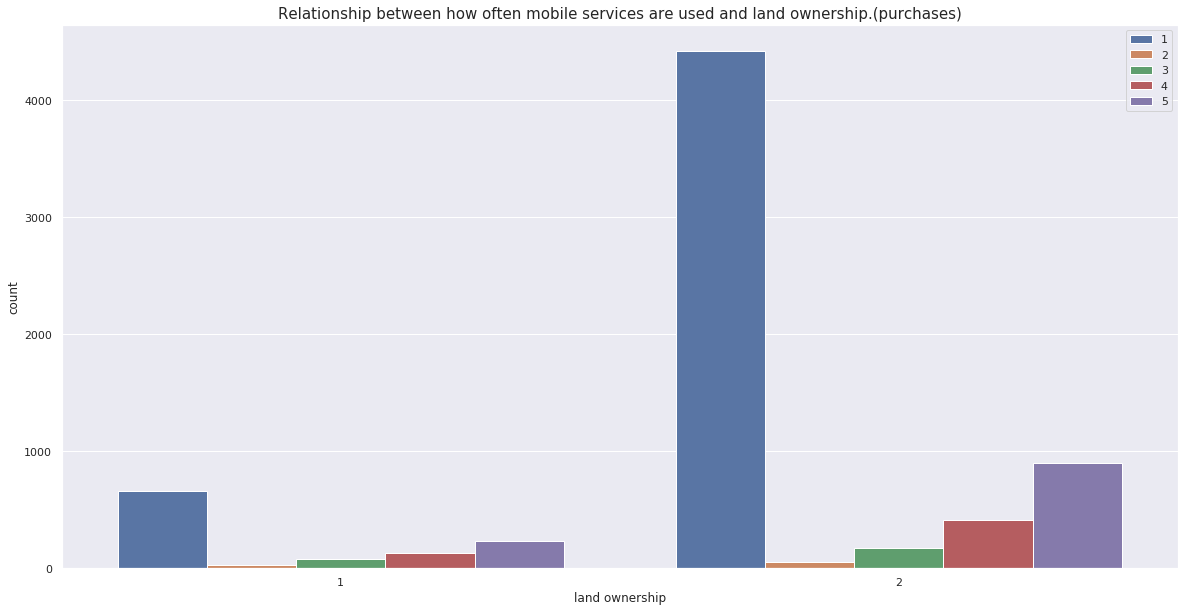

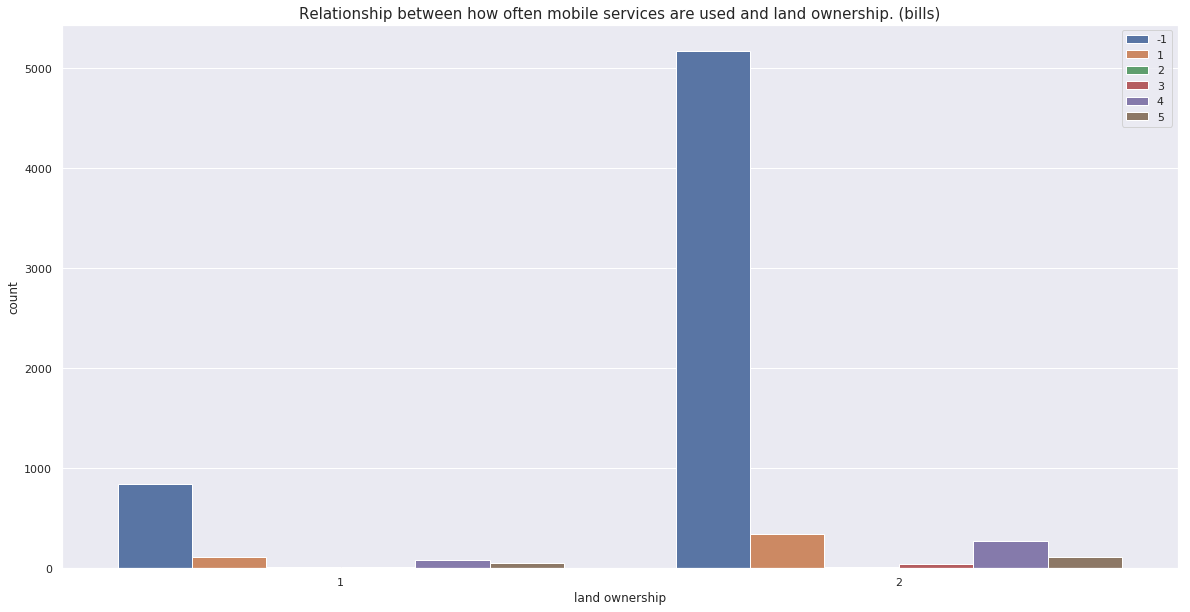

In [29]:
plt.figure(figsize=(20,10))
sns.countplot(x='land ownership', data=cash_outlet, hue='mobile money purchases')
plt.title("Relationship between how often mobile services are used and land ownership.(purchases)", fontsize=15)
plt.legend(loc="upper right")
plt.show()

plt.figure(figsize=(20,10))
sns.countplot(x='land ownership', data=cash_outlet, hue='mobile money bills')
plt.title("Relationship between how often mobile services are used and land ownership. (bills)", fontsize=15)
plt.legend(loc="upper right")
plt.show()

Non-land-owners use mobile services more than land owners.This could be because non-land-owners are young people and people who are unemployed and receive income at a certain time in the month, that is why the monthly usage is higher.

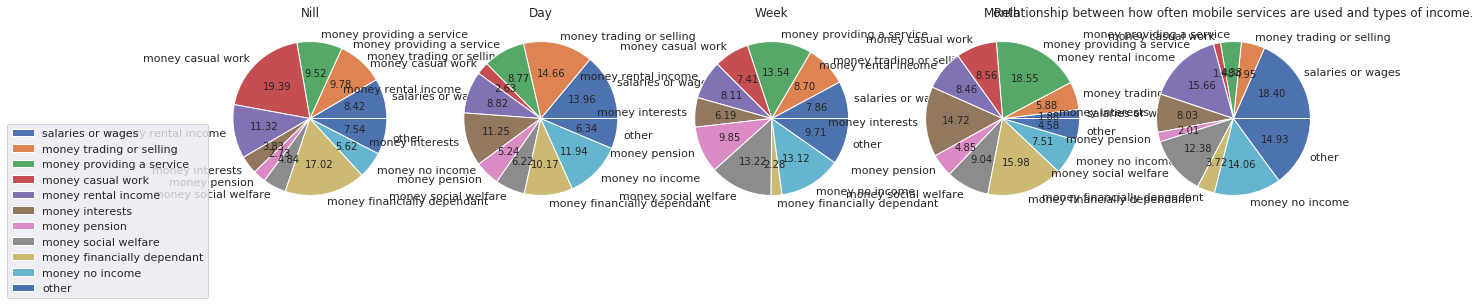

In [30]:
df = pd.DataFrame(3 * np.random.rand(11, 5), index=['salaries or wages','money trading or selling',
                          'money providing a service',
                          'money casual work',
                          'money rental income',
                          'money interests',
                          'money pension',
                          'money social welfare',
                          'money financially dependant',
                          'money no income', 'other'], 
                  columns=['Nill','Day','Week','Month','Less_month'])

labels = list(['salaries or wages','money trading or selling',
                          'money providing a service',
                          'money casual work',
                          'money rental income',
                          'money interests',
                          'money pension',
                          'money social welfare',
                          'money financially dependant',
                          'money no income', 'other'])

fig, axes = plt.subplots(1,5, figsize=(20,10))
for ax, col in zip(axes, df.columns):
    ax.pie(df[col], labels = labels, autopct='%.2f')
    ax.set(title=col, aspect='equal')
plt.title('Relationship between how often mobile services are used and types of income.')
axes[0].legend(bbox_to_anchor=(0, 0.5))


plt.show()

## 5. Create a map to visually explore geographic distribution of mobile services coverage with respect to type of income.

In [31]:
import sys
import folium
from folium.plugins import MarkerCluster


In [32]:
maps = folium.Map(location=[-6.161184, 35.745426], tiles='OpenStreetMap', zoom_start=6)
marker_cluster = MarkerCluster().add_to(maps)
for lat, long in zip(cash_outlet.Latitude, cash_outlet.Longitude):
    folium.Marker(location = [lat, long]
    ).add_to(marker_cluster)
maps

## 6. What can you conclude about use of financial services in Tanzania? Which demographic and geographic factors are associated with mobile money use?

The services are spread out between the eastern and western parts of Tanzania, by the coastal areas. Thats where a lot of fishing happens meaning that trading takes place a lot. With Dar es Salaam being a prominent city  of Tanzania with a lot of tourist attractions. It has the highest population in the country hense the higher use of mobile services in that part of Tanzania. A lot of mobile money companie would target areas where there are a lot of people and a lot of trading happens therefore making these services more accesible in those areas.

Married couples have more access because if one partner uses a certain product they are likely to influence the other to get a similar product. We also observe the large use of mobile services amongst younger poeple or atleast people who are most probarbly employed around the ages(20-60), this could be that they have more interest in using such products and they find it as a more efficient way to get things done.